In [28]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import os
from natsort import natsorted
import random

In [29]:
#Used this to sort out generated images during training with correct naming order
data = os.listdir('D:\Downloads\Generative AI\data')
for images in data:
    epoch, epoch_num, resolution, res_num = images.split('_') 
    res_num = res_num.replace('.png','')
    new_names = resolution+'_'+res_num+'_'+epoch+'_'+epoch_num+'.png'
    os.rename(src=f'D:\Downloads\Generative AI\data\{images}',dst=new_names)


filepaths = 'D:\Downloads\Generative AI\data'
image_files = list()
for files in os.listdir(filepaths):
    image_files.append(os.path.join(filepaths,files))

image_files = natsorted(image_files)

In [ ]:
# Gif
gif_path = 'D:\Downloads\Generative AI\generated_faces(300px).gif'

def resize_images(image_files, size=(300, 300)):
    resized_images = []
    for image_file in image_files:
        img = Image.open(image_file)
        img = img.resize(size, Image.ANTIALIAS)
        resized_images.append(img)
    return resized_images

images = resize_images(image_files=image_files)
images[0].save(gif_path, save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

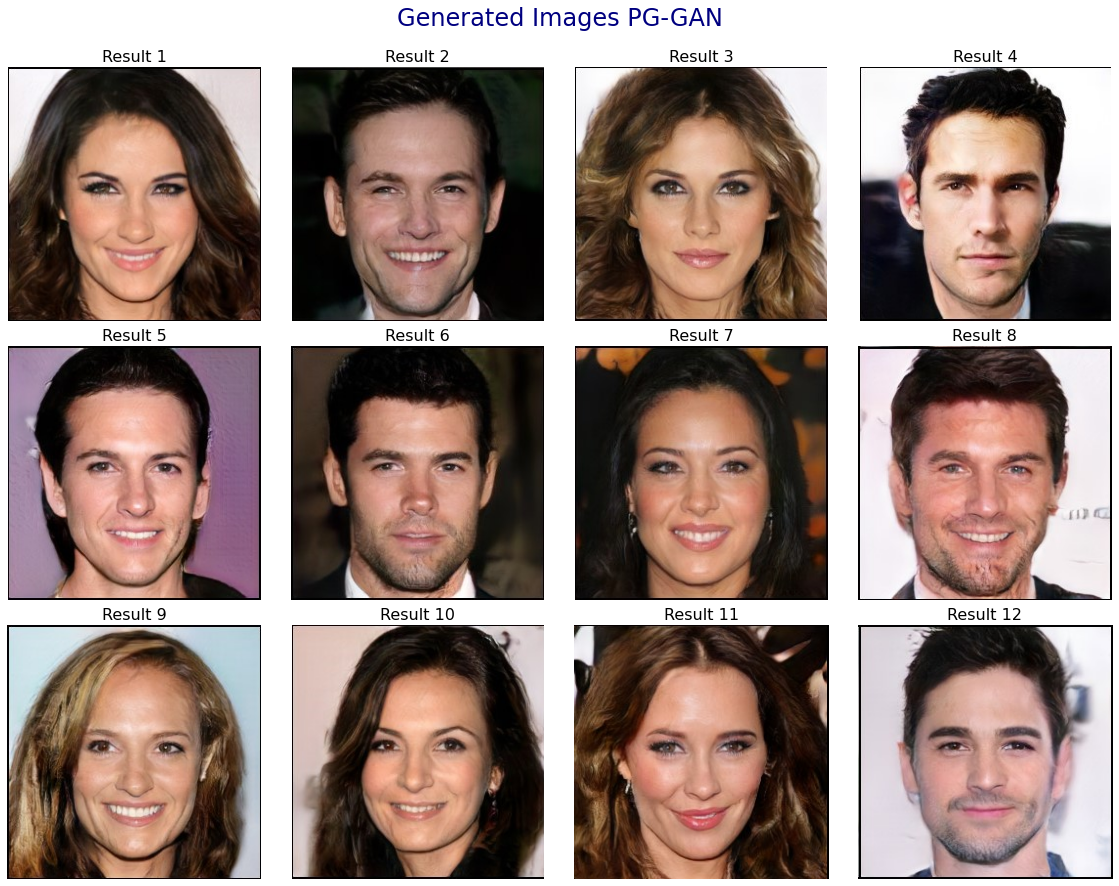

In [143]:
# Results grid for generated images
data = 'D:\Downloads\Generative AI\GANs\Results'
imgs = []
for files in os.listdir('D:\Downloads\Generative AI\GANs\Results'):
    imgs.append(os.path.join(data,files))
cols = 4
nrow = (len(imgs) + cols - 1) // cols
fig, ax = plt.subplots(3, cols, figsize=(22, 14))
fig.suptitle('Generated Images PG-GAN', fontsize=24, x=0.55,y=0.99, color='navy')
random.shuffle(imgs)

for i, paths in enumerate(imgs):
    plt.title('Generated Images PG-GAN')
    row = i // cols
    col = i % cols
    img = imread(paths)
    ax[row, col].imshow(img)
    ax[row, col].axis('off')
    ax[row, col].set_title(f"Result {i+1}", fontsize=16, color='black')

for i in range(len(imgs), 2 * cols):
    row = i // cols
    col = i % cols
    ax[row, col].axis('off')

plt.subplots_adjust(top=0.93, left=0.2, right=0.9, wspace=0.1, hspace=0.1)
plt.show()